In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# The impact of ridge vs lasso regularization

In this notebook, we will explore the impact of ridge vs lasso regression as well the impact of the alpha parameter.

We will do so by generating a dataset through a linear process such that we should be able to fit a linear regression to it easily. We will then make copies of this dataset, one by adding noise and one by making some of the variables redundant. We should be able to fit the original dataset w/out regularization. Ridge should work better on the one that has noise and lasso should improve the one w/ redundant features.

Note that we are not bothering to split our data. We're not trying to make predictions, we're trying to make a point.

### Dataset Generation

In [2]:
from sklearn.datasets import make_regression

In [14]:
def generate_dataset():
    # This generates data according to a linear models with coefficents coef
    # Our goal is to find coef from the (X, y) coordinates

    # It is a standard practice to set the random seed at the beginning of an experiment to make it repeatable
    # It is also common to set it to 42. If you don't know why, I encourage you to find out
    X, y, coef = make_regression(n_samples=10, n_features=10, n_informative=3, coef=True, noise=10, random_state=42)

    # add noise by replacing the last three input variables with randomsness
    X_noise = X.copy()    
    X_noise[:, 7:] = np.random.random((X.shape[0], 3))

    # add redundancy by making five of the features collinear
    # now five of the features are just a multiple of the other five and so provide no additional information
    X_redundant = X.copy()
    X_redundant[:, 5:10] = X_redundant[:, :5]

    return X, X_noise, X_redundant, y

# Assignment

I will fit a model without regularization to the original data. We will evaluate these models using Mean Absolute Percentage Error and rmse.
  * For both of these models smaller is better
  * MAPE is a percentage. It can go to zero but it can also be arbitrarily large
  * rmse is on the same order of magnitude as the original data

You will
  * For alpha values in [0.1, 0.2, ..., 1] fit linear, ridge and lasso models
  * Write a function that plots the version all three models with the best rmse

To do the plotting, we will use the `matplotlib.pyplot` functions:
  * `plot` to draw a line plot of the regression, and
  * `scatter` to draw a scatter plot of the inputs. 

`matplotlib.pyplot` is always imported as `plt`. Don't forget to `plt.show()` when you are done.

In [4]:
def plot_linear(predictions, y):
    plt.scatter(range(len(y)), y, label="Actual", marker="x", color="r")
    plt.plot(predictions, label=f"Predicted: alpha: 0, MAPE: 0, rmse: 0")
    plt.title("Linear Model")
    plt.xlabel("Predictions")
    plt.ylabel("Data Points")
    # set the position of the xticks and their values
    plt.xticks(range(len(y)), range(1, len(y)+1))
    plt.legend()
    plt.show()

In [5]:
# We will make use of the nightmare that is global scope here, b/c it is also the best way to handle the data science workflow
# Life is all about choices...
X, X_noise, X_redundant, y = generate_dataset()

In [6]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as rmse

In [7]:
# first call the constructor
# the ridge and lasso constructors take the named parameter alpha
regressor = LinearRegression()

# all sklearn models have fit and predict functions
regressor.fit(X, y)
prediction = regressor.predict(X)
mape_result = mape(y, prediction)
rmse_result = rmse(y, prediction)
print(f"MAPE: {mape_result: 0.2f}%, rmse:{rmse_result: 0.3f}, alpha=0")

MAPE:  0.00%, rmse: 0.000, alpha=0


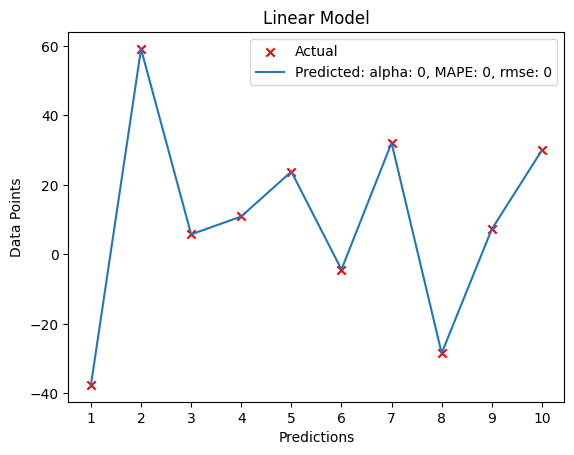

In [8]:
plot_linear(prediction, y)

#### We tried to fit a linear regression to a linear model and, unsurprisingly, it worked

# Your turn

In [9]:
def plot_all(linear_predictions, ridge_predictions, ridge_alpha, lasso_predictions, lasso_alpha, y):
    pass

In [10]:
def fit_data(X, y):
    """ Fits linear, ridge and lasso models 

    Fits linear, ridge and lasso models for alpha in [0.1, 0.2, ... 1], computing rmse and MAPE for each model and picking the winner

    Args:
        X (ndarray): Input data. Noisy or redundant
        y (array): Labels

    Returns:
        (array, array, float, array, float) predictions from the best of each model, along with the alphas that produced them

    Side-effects:
        prints winning evaluations and alphas
    """
    pass

In [12]:
# evaluate models and find winners

In [13]:
# plot the winners